# Dutch primary school denomination classificator
 
## Overview

I need to choose a school for child and I have a problem there -  I don't know what should I look at in this process. For example there are a lot of school types: 'Openbaar', 'Rooms-Katholiek', 'Protestants-Christelijk', etc. As for a person who never met this system before it's not very clear for me which one should I choose and which one would fit my child better. On the other hand I want to make a desicion based on objective data such as
- Scores in final tests.
- A number of students from the school who got recommended to continue their education on a particular 'level' in future.
- A 'quality' of students knowledge.
- Etc. 

As a result of all this thoughts I realized that I have a following issue: I don't know if I need to choose a type of a school together with other characteristics, or the type can be explained by those characteristics. If the second thought is true, then I can just choose the characteristics that I want for my childs school to have and they will simply define the best type of school. In other words, is it possible to make a classifier which would identify whether a school is Openbaar or Rooms-Katholiek or has other denomination based on other characterrictics we have? 

I found and pooled in a dataset with the most important information I want to know about my childs future school. Now I want to know if I need to choose a denomination of a school (and spend time to investigate what each school denomination means in Dutch culture, their comparison and so on)? Or I can just choose other characteristic (which look more clear to me) and they will define a denomination of a school. I will build several classifiers based on different ML alghorithms. Then I will try to choose the best of them and see if the best classifier works good enough to predict a denomination of a primary school. If there is no such classifier, we can conclude the denomination is a purely non-derivative feature and can be ignored while choosing a school.

## Data preparation

Let's start with reading the dataset from the file called 'Score.csv':

In [235]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

data_score = pd.read_csv("./make_school_data/main/output/Score.csv", error_bad_lines=False, sep=',', encoding = "ISO-8859-1") 
print(data_score.shape)
print(data_score.columns)
data_score.head() 

(31300, 33)
Index(['SCHOOL_ID', 'DATUM', 'INSTELLINGSNAAM_VESTIGING', 'POSTCODE_VESTIGING',
       'PLAATSNAAM', 'GEMEENTENAAM', 'PROVINCIE', 'SOORT_PO',
       'DENOMINATIE_VESTIGING', 'EXAMEN', 'EXAMEN_AANTAL', 'EXAMEN_GEM',
       'REKENEN_LAGER1F', 'REKENEN_1F', 'REKENEN_1S', 'REKENEN_2F',
       'LV_LAGER1F', 'LV_1F', 'LV_2F', 'TV_LAGER1F', 'TV_1F', 'TV_2F', 'VSO',
       'PRO', 'VMBO', 'VMBO_HAVO', 'HAVO', 'HAVO_VWO', 'VWO',
       'ADVIES_NIET_MOGELIJK', 'TOTAAL_ADVIES', 'LJ8', 'ZIT'],
      dtype='object')


,SCHOOL_ID,DATUM,INSTELLINGSNAAM_VESTIGING,POSTCODE_VESTIGING,PLAATSNAAM,GEMEENTENAAM,PROVINCIE,SOORT_PO,DENOMINATIE_VESTIGING,EXAMEN,...,PRO,VMBO,VMBO_HAVO,HAVO,HAVO_VWO,VWO,ADVIES_NIET_MOGELIJK,TOTAAL_ADVIES,LJ8,ZIT
0,000AP_2015,2015,De Schanskorf,2715BT,ZOETERMEER,Zoetermeer,Zuid-Holland,Bo,Gereformeerd vrijgemaakt,CET,...,0,1,0,5,1,1,0,11,13,0
1,000AR_2015,2015,"BS ""De Maasparel""",6109AM,OHE EN LAAK,Maasgouw,Limburg,Bo,Rooms-Katholiek,CET,...,0,1,0,7,0,6,0,18,17,0
2,000AZ_2015,2015,De Kiezel en de Kei,2971AR,BLESKENSGRAAF CA,Molenwaard,Zuid-Holland,Bo,Openbaar,CET,...,1,3,5,3,2,4,0,22,19,3
3,000BA_2015,2015,OBS De Klimboom,6666EB,HETEREN,Overbetuwe,Gelderland,Bo,Openbaar,CET,...,1,1,0,1,4,0,0,12,24,5
4,000BB_2015,2015,Obs Letterwies,9944AR,NIEUWOLDA,Oldambt,Groningen,Bo,Openbaar,CET,...,0,7,0,5,0,2,0,16,15,2


There are a lot of variables which define an address of a school in different ways here. We need to choose one of them. I think we can leave **GEMEENTENAAM** column as a variable which explains location and remove the rest of the the address columns:

In [236]:
columns = ['SCHOOL_ID', 'DATUM', 'INSTELLINGSNAAM_VESTIGING', 'POSTCODE_VESTIGING', 'PLAATSNAAM', 
           'PROVINCIE']
print(data_score.shape)
data_score.drop(columns, 1, inplace = True)
print(data_score.shape)
print(data_score.columns)
data_score.head()

(31300, 33)
(31300, 27)
Index(['GEMEENTENAAM', 'SOORT_PO', 'DENOMINATIE_VESTIGING', 'EXAMEN',
       'EXAMEN_AANTAL', 'EXAMEN_GEM', 'REKENEN_LAGER1F', 'REKENEN_1F',
       'REKENEN_1S', 'REKENEN_2F', 'LV_LAGER1F', 'LV_1F', 'LV_2F',
       'TV_LAGER1F', 'TV_1F', 'TV_2F', 'VSO', 'PRO', 'VMBO', 'VMBO_HAVO',
       'HAVO', 'HAVO_VWO', 'VWO', 'ADVIES_NIET_MOGELIJK', 'TOTAAL_ADVIES',
       'LJ8', 'ZIT'],
      dtype='object')


,GEMEENTENAAM,SOORT_PO,DENOMINATIE_VESTIGING,EXAMEN,EXAMEN_AANTAL,EXAMEN_GEM,REKENEN_LAGER1F,REKENEN_1F,REKENEN_1S,REKENEN_2F,...,PRO,VMBO,VMBO_HAVO,HAVO,HAVO_VWO,VWO,ADVIES_NIET_MOGELIJK,TOTAAL_ADVIES,LJ8,ZIT
0,Zoetermeer,Bo,Gereformeerd vrijgemaakt,CET,11,534.3,0,0,0,0,...,0,1,0,5,1,1,0,11,13,0
1,Maasgouw,Bo,Rooms-Katholiek,CET,18,539.8,0,0,0,0,...,0,1,0,7,0,6,0,18,17,0
2,Molenwaard,Bo,Openbaar,CET,22,532.9,0,0,0,0,...,1,3,5,3,2,4,0,22,19,3
3,Overbetuwe,Bo,Openbaar,CET,11,536.2,0,0,0,0,...,1,1,0,1,4,0,0,12,24,5
4,Oldambt,Bo,Openbaar,CET,16,531.3,0,0,0,0,...,0,7,0,5,0,2,0,16,15,2


Next I would like to explore the outcome:

Openbaar                          9951
Rooms-Katholiek                   9588
Protestants-Christelijk           7899
Algemeen bijzonder                1513
Reformatorisch                     806
Gereformeerd vrijgemaakt           534
Antroposofisch                     328
Samenwerking PC, RK                265
Islamitisch                        235
Interconfessioneel                  60
Evangelisch                         41
Hindoeistisch                       32
Samenwerking Opb., RK               15
Samenwerking Opb., PC               15
Joods                               10
Evangelische broedergemeenscha       4
Samenwerking PC, RK, Alg. Bijz       4
Name: DENOMINATIE_VESTIGING, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)


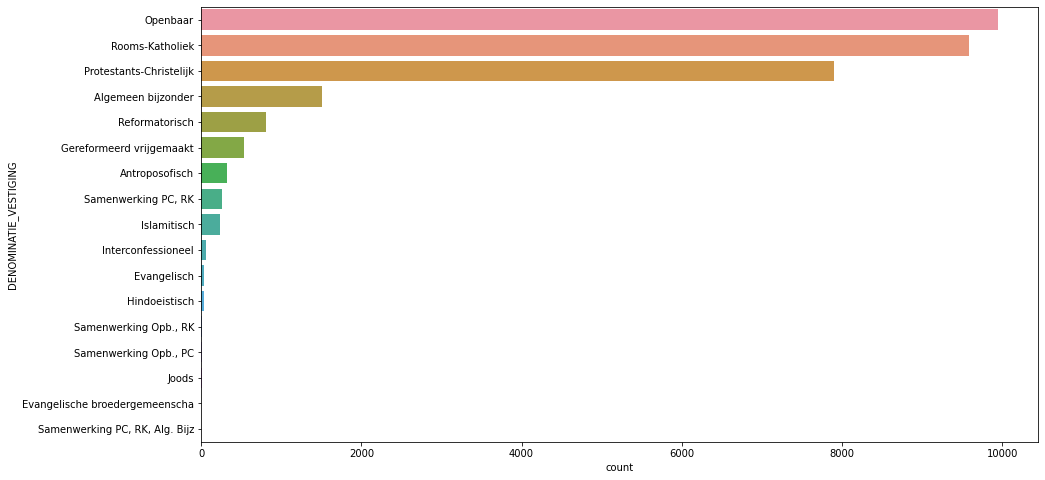

In [237]:
print(data_score['DENOMINATIE_VESTIGING'].value_counts())
plt.figure(figsize=(15,8))
print(sns.countplot(y='DENOMINATIE_VESTIGING',data=data_score, 
                    order = data_score['DENOMINATIE_VESTIGING'].value_counts().index))

From the plot and data above I see that there are several values of **DENOMINATIE_VESTIGING** column with relatively small amoumt of data. Let's remove rows with a number of the denomination values smaller than 0.5% of the total observations amount.

In [238]:
values_to_remove = []
value_counts = data_score['DENOMINATIE_VESTIGING'].value_counts()
threshold = 0.005 * len(data_score['DENOMINATIE_VESTIGING'])
for column in data_score['DENOMINATIE_VESTIGING'].value_counts().index.tolist():
    if value_counts[column] < threshold:
        values_to_remove.append(column)
values_to_remove

['Interconfessioneel',
 'Evangelisch',
 'Hindoeistisch',
 'Samenwerking Opb., RK',
 'Samenwerking Opb., PC',
 'Joods',
 'Evangelische broedergemeenscha',
 'Samenwerking PC, RK, Alg. Bijz']

In [239]:
print(data_score.shape)
data_score = data_score.drop(data_score[data_score['DENOMINATIE_VESTIGING'].isin(values_to_remove)].index, 0)
data_score.shape

(31300, 27)


(31119, 27)

In the dataset there are 3 categorical columns. Before starting the modelling we need to convert all the categorical variables to numerical ones. Let's use ***LabelEncoder*** this time: 

In [240]:
from sklearn.preprocessing import LabelEncoder

data_score['SOORT_PO'] = LabelEncoder().fit_transform(data_score['SOORT_PO'])

data_score['GEMEENTENAAM'] = LabelEncoder().fit_transform(data_score['GEMEENTENAAM'])

data_score['DENOMINATIE_VESTIGING'] = LabelEncoder().fit_transform(data_score['DENOMINATIE_VESTIGING'])

data_score['EXAMEN'] = LabelEncoder().fit_transform(data_score['EXAMEN'])
data_score.head()

,GEMEENTENAAM,SOORT_PO,DENOMINATIE_VESTIGING,EXAMEN,EXAMEN_AANTAL,EXAMEN_GEM,REKENEN_LAGER1F,REKENEN_1F,REKENEN_1S,REKENEN_2F,...,PRO,VMBO,VMBO_HAVO,HAVO,HAVO_VWO,VWO,ADVIES_NIET_MOGELIJK,TOTAAL_ADVIES,LJ8,ZIT
0,402,0,2,2,11,534.3,0,0,0,0,...,0,1,0,5,1,1,0,11,13,0
1,210,0,7,2,18,539.8,0,0,0,0,...,0,1,0,7,0,6,0,18,17,0
2,227,0,4,2,22,532.9,0,0,0,0,...,1,3,5,3,2,4,0,22,19,3
3,271,0,4,2,11,536.2,0,0,0,0,...,1,1,0,1,4,0,0,12,24,5
4,253,0,4,2,16,531.3,0,0,0,0,...,0,7,0,5,0,2,0,16,15,2


## Building classification models

Ley's try to build classification models using several different ML alghorithms: Random Forest, SVM, KNN, XGBoosting. 

First of all, we need to standardize the data and split it into test and train subsets:

In [241]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.metrics import roc_curve

pred = data_score['DENOMINATIE_VESTIGING']

data_score.drop('DENOMINATIE_VESTIGING', 1, inplace = True)

random_state = 4004

scaler = MinMaxScaler()
data = scaler.fit_transform(data_score)
    
X_train, X_test, y_train, y_test = train_test_split(data, pred, train_size=0.7, test_size=0.3, random_state=random_state)

### Random forest

In [242]:
rfc = RandomForestClassifier(n_estimators=100, random_state = random_state)
rfc.fit(X_train, y_train)
pred_test = rfc.predict(X_test)


In [243]:
rfc_score = rfc.score(X_test, y_test)
print("Random Forest's accuracy is: {:.2%}".format(rfc_score))

Random Forest's accuracy is: 40.47%


### K Nearest Neighbors 

In [244]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
preds = knn.predict(X_test)
pred_test = knn.predict(X_test)

In [245]:
knn_score = knn.score(X_test, y_test)
print("KNN's accuracy is: {:.2%}".format(knn_score))

KNN's accuracy is: 34.89%


### XGBoost

In [246]:
xgb = XGBClassifier(n_estimators=100)
xgb.fit(X_train, y_train)
pred_test = xgb.predict(X_test)

In [247]:
xgb_score = (pred_test == y_test).sum() / len(pred_test)
print("XGBoost's prediction accuracy is: {:.2%}".format(xgb_score))

XGBoost's prediction accuracy is: 51.86%


In [248]:
results = pd.DataFrame({
    'Model': ['Random Forest', 'KNN', 'XGBoost'],
    'Score': ["{:.2%}".format(rfc_score), "{:.2%}".format(knn_score), "{:.2%}".format(xgb_score)]})
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Model')
result_df

,Score
Model,
XGBoost,51.86%
Random Forest,40.47%
KNN,34.89%




We can see that none of the ML algorithm was able to build an apropriate model. The best one shows accuracy of a mere 52% which is far from perfect.

That means classes of different denominations do not differ that much from each other based on the objective criteria we have in the dataset. In other words: denominations are more or less the same if compared with objective numbers.

Therefore I can conclude that while choosing a school for my child I may ignore schools denominations and concentrate on scores, knowledge quality and other metrics which are important and familiar to me.